In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import tensorflow as tf
import os

# MODEL BUILDING

Adding The Convolution Layer

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)

In [6]:
x_train=train_datagen.flow_from_directory('/content/Dataset/training_set',target_size=(64,64), class_mode='categorical',batch_size=900)

Found 15750 images belonging to 9 classes.


In [7]:
x_test=test_datagen.flow_from_directory('/content/Dataset/test_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [8]:
print("Len x-train : ", len(x_train))

Len x-train :  18


In [9]:
print("Len x-test : ", len(x_test))

Len x-test :  12


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [11]:
# let img1 be an image with no features
img1 = np.array([np.array([200, 200]), np.array([200, 200])])
img2 = np.array([np.array([200, 200]), np.array([0, 0])])
img3 = np.array([np.array([200, 0]), np.array([200, 0])])
  
kernel_horizontal = np.array([np.array([2, 2]), np.array([-2, -2])])
print(kernel_horizontal, 'is a kernel for detecting horizontal edges')
  
kernel_vertical = np.array([np.array([2, -2]), np.array([2, -2])])
print(kernel_vertical, 'is a kernel for detecting vertical edges')

[[ 2  2]
 [-2 -2]] is a kernel for detecting horizontal edges
[[ 2 -2]
 [ 2 -2]] is a kernel for detecting vertical edges


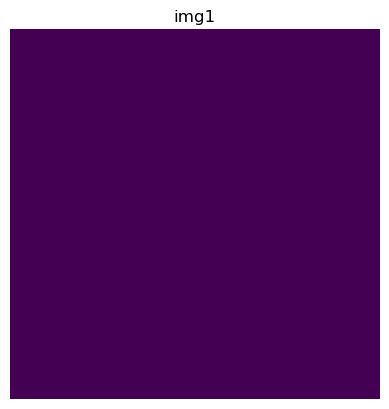

Horizontal edge confidence score: 0
Vertical edge confidence score: 0


In [12]:
def apply_kernel(img, kernel):
    return np.sum(np.multiply(img, kernel))
  
# Visualizing img1
plt.imshow(img1)
plt.axis('off')
plt.title('img1')
plt.show()

# Checking for horizontal and vertical features in image1
print('Horizontal edge confidence score:', apply_kernel(img1, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img1, 
                                            kernel_vertical))

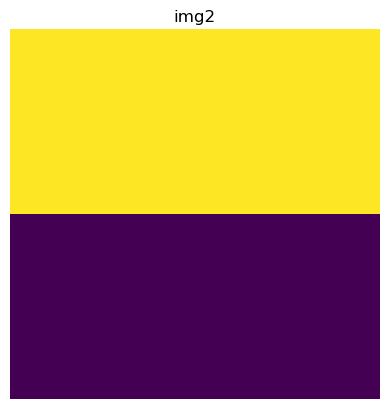

Horizontal edge confidence score: 800
Vertical edge confidence score: 0


In [13]:
# Visualizing img2
plt.imshow(img2)
plt.axis('off')
plt.title('img2')
plt.show()

# Checking for horizontal and vertical features in image2
print('Horizontal edge confidence score:', apply_kernel(img2, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img2, 
                                            kernel_vertical))

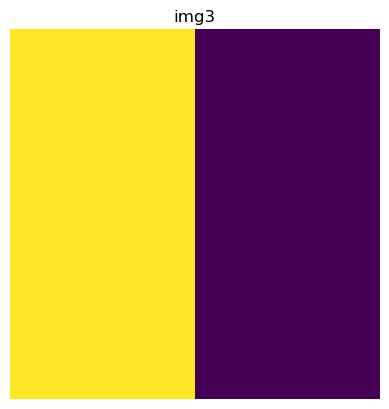

Horizontal edge confidence score: 0
Vertical edge confidence score: 800


In [14]:
# Visualizing img3
plt.imshow(img3)
plt.axis('off')
plt.title('img3')
plt.show()
  
# Checking for horizontal and vertical features in image3
print('Horizontal edge confidence score:', apply_kernel(img3, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img3, 
                                            kernel_vertical))

In [15]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [18]:
from keras import layers

# Creating Model

In [19]:
model=Sequential()

# Adding Layers

In [20]:

model.add(Conv2D(33,(3,3),input_shape=(64,64,1), activation='relu'))

model.add(Flatten())

# 1st hidden layer

In [21]:
model.add(Dense(400,activation='relu'))

# 2nd hidden layer

In [22]:
model.add(Dense(200,activation='relu'))

# 3rd hidden layer

In [23]:
model.add(Dense(100,activation='relu'))

# output layer

In [24]:
model.add(Dense(9,activation='softmax'))

# Compile The Model

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit The Model

In [26]:
model.fit(x_train,epochs=10,validation_data=x_test,verbose=1)

Epoch 1/10
18/18 [==============================] - 65s 3s/step - loss: 2.5506 - accuracy: 0.4121 - val_loss: 0.7589 - val_accuracy: 0.7578
Epoch 2/10
18/18 [==============================] - 54s 3s/step - loss: 0.5381 - accuracy: 0.8315 - val_loss: 0.3140 - val_accuracy: 0.9080
Epoch 3/10
18/18 [==============================] - 53s 3s/step - loss: 0.2444 - accuracy: 0.9321 - val_loss: 0.2421 - val_accuracy: 0.9302
Epoch 4/10
18/18 [==============================] - 53s 3s/step - loss: 0.1302 - accuracy: 0.9657 - val_loss: 0.2169 - val_accuracy: 0.9360
Epoch 5/10
18/18 [==============================] - 51s 3s/step - loss: 0.0766 - accuracy: 0.9808 - val_loss: 0.1548 - val_accuracy: 0.9573
Epoch 6/10
18/18 [==============================] - 51s 3s/step - loss: 0.0516 - accuracy: 0.9876 - val_loss: 0.1587 - val_accuracy: 0.9627
Epoch 7/10
18/18 [==============================] - 52s 3s/step - loss: 0.0361 - accuracy: 0.9921 - val_loss: 0.1431 - val_accuracy: 0.9760
Epoch 8/10
18/18 [==

# Save The Model

In [27]:
model.save('aslpng1.h5')

In [28]:
pip install opencv-python


  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


# Import the packages and load the saved model

In [29]:
from keras.models import load_model
import numpy as np
import cv2

In [30]:
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('aslpng1.h5')

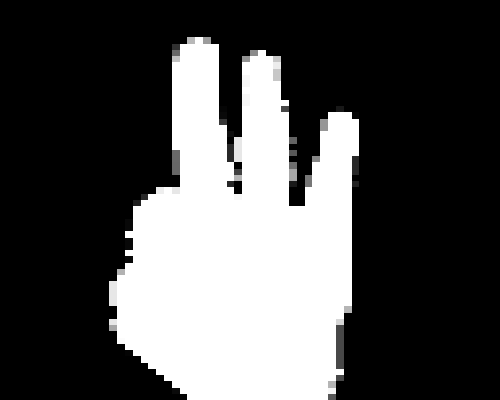

In [32]:
img=image.load_img('/content/Dataset/test_set/F/10.png',target_size=(400,500))
img

In [33]:
arr= image.img_to_array(img)

In [34]:
pwd

'C:\\Users\\Harini'

In [35]:
img=image.load_img('/content/Dataset/test_set/F/10.png',target_size=(100,100))

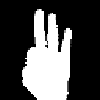

In [36]:
img

In [37]:
x=image.img_to_array(img)

In [38]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [39]:
x.shape

(100, 100, 3)

In [40]:
x= np.expand_dims(x,axis=0)

In [41]:
x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [42]:
x.shape

(1, 100, 100, 3)

In [43]:
y= tf.expand_dims(x, axis=-1)

In [44]:
y

<tf.Tensor: shape=(1, 100, 100, 3, 1), dtype=float32, numpy=
array([[[[[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         ...,

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]]],


        [[[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         ...,

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]]],


        [[[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         ...,

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
        

In [45]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [46]:
index=['A','B','C','D','E','F','G','H','I']

In [47]:
img=image.load_img('/content/Dataset/test_set/B/10.png',target_size=(100,100))

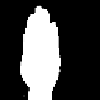

In [48]:
img

In [49]:
x=image.img_to_array(img)

In [50]:
x=np.expand_dims(x,axis=0)

In [51]:
y

<tf.Tensor: shape=(1, 100, 100, 3, 1), dtype=float32, numpy=
array([[[[[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         ...,

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]]],


        [[[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         ...,

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]]],


        [[[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         ...,

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
        

In [52]:
index=['A','B','C','D','E','F','G','H','I']

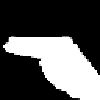

In [53]:
img = image.load_img('/content/Dataset/test_set/H/107.png',target_size = (100,100))
img

In [54]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [55]:
img=image.load_img("/content/Dataset/test_set/H/107.png")
detect(img)

1/1 [==============================] - 0s 314ms/step
THE PREDICTED LETTER IS  H


In [56]:
img = image.load_img('/content/Dataset/test_set/A/110.png')
pred=detect(img)

1/1 [==============================] - 0s 27ms/step
THE PREDICTED LETTER IS  A


In [57]:
img=image.load_img('/content/Dataset/test_set/E/111.png')
detect(img)

1/1 [==============================] - 0s 32ms/step
THE PREDICTED LETTER IS  E


In [58]:
from skimage.transform import resize
def detect(frame):
    img=resize(frame,(64,64,1))
    img=np.expand_dims(img,axis=0)
    if(np.max(img)>1):
        img=img/255.0
    prediction=model.predict(img)
    print(prediction)
    prediction=model.predict_classes(img)
    print(prediction)

In [59]:
img=image.load_img(r'/content/Dataset/test_set/D/2.png',
                   target_size=(64,64))

# Load The Test Image, Pre-Process It And Predict

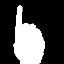

In [60]:
img

In [61]:
x=image.img_to_array(img)

In [62]:
x.ndim

3

In [63]:
x=np.expand_dims(x,axis=0)

In [64]:
x.ndim

4

In [65]:
pred=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 85ms/step


In [66]:
pred

array([3], dtype=int64)

In [67]:
index=['A','B','C','D','E','F','G','H','I']
print(index[pred[0]])

D


# OPEN CV

In [68]:
import cv2

In [69]:
img=cv2.imread(r'/content/Dataset/test_set/C/2.png',1)

In [70]:
img1=cv2.imread(r'/content/Dataset/test_set/B/2.png',0)

In [71]:
print(img.shape)

(64, 64, 3)
